In [25]:
# Step 1: Import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble     import RandomForestRegressor

# Load the completed projects dataset
completed_file_path = 'completed.xlsx'
df = pd.read_excel(completed_file_path)

print("First 5 rows of completed data:")
display(df.head())
print("\nColumns:", df.columns.tolist())


First 5 rows of completed data:


,Identifier,District,PlannedDuration,Budget,EstimatedCost,ActualCost,ActualDuration,PC1,PC2,PC3,PC4
0,M833,2,108,218503,204306,199884,80,-0.465727,-1.553767,-1.405570,1.683797
1,KBOR,17,178,126629,101845,20196,312,1.043718,0.639800,-0.169787,0.754588
2,KBDA,19,112,56896,56896,31712,126,1.043718,0.639800,-0.169787,0.754588
3,XAIN,9,121,114030,115828,25423,30,-2.087513,0.777784,-0.594138,0.270676
4,KBUH,21,119,94132,76182,14120,175,-2.216809,0.724153,-0.351168,0.312013



Columns: ['Identifier', 'District', 'PlannedDuration', 'Budget', 'EstimatedCost', 'ActualCost', 'ActualDuration', 'PC1', 'PC2', 'PC3', 'PC4']


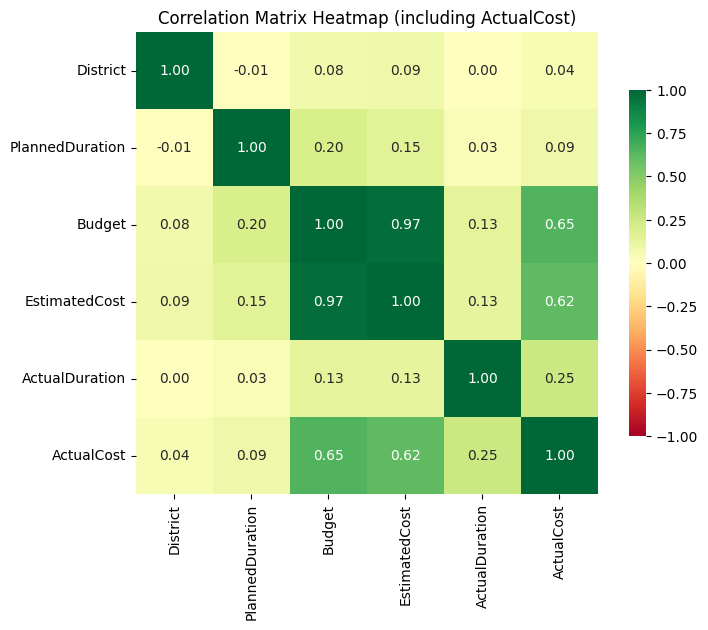

In [26]:
# Step 2: Compute correlation matrix including ActualCost
features = [
    'District',
    'PlannedDuration',
    'Budget',
    'EstimatedCost',
    'ActualDuration',
    'ActualCost'           # <-- new target column
]
corr_df = df[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_df,
    annot=True, fmt=".2f",
    cmap='RdYlGn', vmin=-1, vmax=1,
    square=True, cbar_kws={"shrink": .75}
)
plt.title("Correlation Matrix Heatmap (including ActualCost)")
plt.show()


In [27]:
# Step 1: Import necessary libraries and load the completed dataset
import pandas as pd

# Load the completed projects data from Excel
completed_file_path = 'completed.xlsx'  # Replace with your actual path
completed_df = pd.read_excel(completed_file_path)

# Display the first 5 rows to verify the data is loaded correctly
print("First 5 rows of Completed dataset:")
print(completed_df.head())

# Display the columns to verify structure
print("\nColumns in Completed dataset:")
print(completed_df.columns)


First 5 rows of Completed dataset:
  Identifier  District  PlannedDuration  Budget  EstimatedCost  ActualCost  \
0       M833         2              108  218503         204306      199884   
1       KBOR        17              178  126629         101845       20196   
2       KBDA        19              112   56896          56896       31712   
3       XAIN         9              121  114030         115828       25423   
4       KBUH        21              119   94132          76182       14120   

   ActualDuration       PC1       PC2       PC3       PC4  
0              80 -0.465727 -1.553767 -1.405570  1.683797  
1             312  1.043718  0.639800 -0.169787  0.754588  
2             126  1.043718  0.639800 -0.169787  0.754588  
3              30 -2.087513  0.777784 -0.594138  0.270676  
4             175 -2.216809  0.724153 -0.351168  0.312013  

Columns in Completed dataset:
Index(['Identifier', 'District', 'PlannedDuration', 'Budget', 'EstimatedCost',
       'ActualCost', 'Actu

In [28]:
# Step 2: Extract relevant columns and compute correlation matrix

# Select the relevant columns only
features = ['District', 'PlannedDuration', 'Budget', 'EstimatedCost', 'ActualCost', 'ActualDuration']
completed_features_df = completed_df[features]

# Display the first 5 rows of the selected features to verify
print("Selected features preview:")
print(completed_features_df.head())

# Compute the correlation matrix of these features
correlation_matrix = completed_features_df.corr()

# Display the correlation matrix
print("\nCorrelation matrix:")
print(correlation_matrix)


Selected features preview:
   District  PlannedDuration  Budget  EstimatedCost  ActualCost  \
0         2              108  218503         204306      199884   
1        17              178  126629         101845       20196   
2        19              112   56896          56896       31712   
3         9              121  114030         115828       25423   
4        21              119   94132          76182       14120   

   ActualDuration  
0              80  
1             312  
2             126  
3              30  
4             175  

Correlation matrix:
                 District  PlannedDuration    Budget  EstimatedCost  \
District         1.000000        -0.007733  0.075214       0.087991   
PlannedDuration -0.007733         1.000000  0.195402       0.154576   
Budget           0.075214         0.195402  1.000000       0.973686   
EstimatedCost    0.087991         0.154576  0.973686       1.000000   
ActualCost       0.042464         0.085092  0.649595       0.617041   
Act

In [29]:
# Step 4: Calculate feature importance using Random Forest regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare input features (X) and target variable (y)
X = completed_features_df.drop(columns=['ActualDuration'])  # Features: District, PlannedDuration, Budget, EstimatedCost, ActualCost
y = completed_features_df['ActualDuration']                 # Target: ActualDuration

# Split data into train and test sets (80% train, 20% test) for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for feature importance for easier visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature importances from Random Forest:")
print(feature_importance_df)

# Optional: plot feature importances
import matplotlib.pyplot as plt



Feature importances from Random Forest:
           Feature  Importance
4       ActualCost    0.259092
3    EstimatedCost    0.220633
2           Budget    0.198956
1  PlannedDuration    0.188161
0         District    0.133159


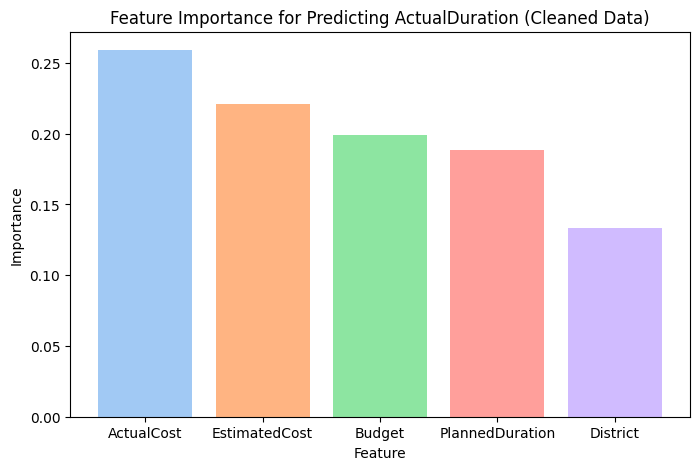

In [30]:
import seaborn as sns

# Choose a pastel color palette based on number of features
colors = sns.color_palette("pastel", len(feature_importance_df))

# Plot with custom colors
plt.figure(figsize=(8, 5))
plt.bar(
    feature_importance_df['Feature'],
    feature_importance_df['Importance'],
    color=colors
)
plt.title('Feature Importance for Predicting ActualDuration (Cleaned Data)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


In [31]:
# Step 1: Import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble     import RandomForestRegressor

# Load the completed projects dataset
completed_file_path = 'completed.xlsx'
df = pd.read_excel(completed_file_path)

print("First 5 rows of completed data:")
display(df.head())
print("\nColumns:", df.columns.tolist())


First 5 rows of completed data:


,Identifier,District,PlannedDuration,Budget,EstimatedCost,ActualCost,ActualDuration,PC1,PC2,PC3,PC4
0,M833,2,108,218503,204306,199884,80,-0.465727,-1.553767,-1.405570,1.683797
1,KBOR,17,178,126629,101845,20196,312,1.043718,0.639800,-0.169787,0.754588
2,KBDA,19,112,56896,56896,31712,126,1.043718,0.639800,-0.169787,0.754588
3,XAIN,9,121,114030,115828,25423,30,-2.087513,0.777784,-0.594138,0.270676
4,KBUH,21,119,94132,76182,14120,175,-2.216809,0.724153,-0.351168,0.312013



Columns: ['Identifier', 'District', 'PlannedDuration', 'Budget', 'EstimatedCost', 'ActualCost', 'ActualDuration', 'PC1', 'PC2', 'PC3', 'PC4']


In [32]:
# Step 3: Check for missing values in ActualCost and clean
missing = df['ActualCost'].isna().sum()
print(f"Missing ActualCost values: {missing}")

df_clean = df.dropna(subset=['ActualCost'])
print(f"Rows after dropping missing target: {df_clean.shape[0]} (dropped {missing} rows)")


Missing ActualCost values: 0
Rows after dropping missing target: 984 (dropped 0 rows)


In [33]:
# Step 4: Prepare training data for ActualCost prediction
X = df_clean[['District','PlannedDuration','Budget','EstimatedCost','ActualDuration']]
y = df_clean['ActualCost']

# Random 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)
print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Train samples: 787, Test samples: 197


In [34]:
# Step 5: Train Random Forest and extract feature importances
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("Feature importances for predicting ActualCost:")
display(feat_imp_df)


Feature importances for predicting ActualCost:


,Feature,Importance
3,EstimatedCost,0.800658
4,ActualDuration,0.076651
1,PlannedDuration,0.051097
2,Budget,0.048043
0,District,0.023552


In [35]:
# Step 3: Prepare data for feature importance analysis (ActualCost)

# Define the dataframe used for modeling
completed_features_df = df[features].copy()

# Check and remove missing values in ActualCost
missing_count = completed_features_df['ActualCost'].isna().sum()
print(f"Number of missing values in ActualCost: {missing_count}")

completed_features_clean = completed_features_df.dropna(subset=['ActualCost'])
print(f"Remaining missing values after dropping: {completed_features_clean['ActualCost'].isna().sum()}")

# Prepare X and y
X_clean = completed_features_clean.drop(columns=['ActualCost'])
y_clean = completed_features_clean['ActualCost']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_clean.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display importance
print("Feature importances from Random Forest for ActualCost:")
print(feature_importance_df)




Number of missing values in ActualCost: 0
Remaining missing values after dropping: 0
Feature importances from Random Forest for ActualCost:
           Feature  Importance
3    EstimatedCost    0.800658
4   ActualDuration    0.076651
1  PlannedDuration    0.051097
2           Budget    0.048043
0         District    0.023552


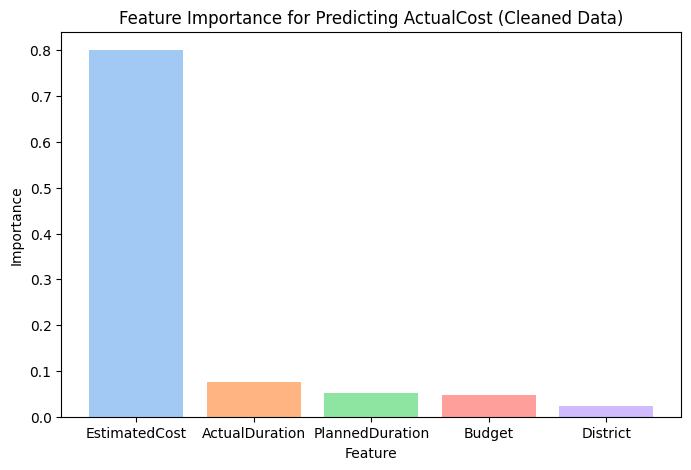

In [36]:
import seaborn as sns

# Choose a pastel color palette based on number of features
colors = sns.color_palette("pastel", len(feature_importance_df))

# Plot with custom colors
plt.figure(figsize=(8, 5))
plt.bar(
    feature_importance_df['Feature'],
    feature_importance_df['Importance'],
    color=colors
)
plt.title('Feature Importance for Predicting ActualCost (Cleaned Data)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()
